In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import mpl_toolkits.mplot3d.axes3d as p3

In [2]:
import sys
sys.path.insert(0, "../")
import src.constants.names as names
from src.constants.miscellaneous import DATA, MODEL, PARAMS, TRAIN, VALIDATION, TEST, CONFIG_FILE_NAME, IMAGE, LABEL, \
    TRAILING_HASHTAG, IMAGE_DATA_FILE_NAME, LABELS_FILE_NAME, PATCH_DDSM_PROCESSED, CHECKPOINT_ENDING, PARAM_SEPARATOR, \
    ID
import os

In [3]:

EXP_ROOT_DIR = '/home/wm/mff/diploma/models/ANALYSIS_FOLDS'


In [19]:
from typing import List
from src.models.prediction_storage import Storage

loader_name = 'test'
predictions_file_name = 'predictions.h5'

all_run_pathes = [root for root, dir_, files in os.walk(EXP_ROOT_DIR) if 'test'+predictions_file_name in files]

all_run_predictions = {}
all_run_predictions['test'] = [pd.HDFStore(os.path.join(run_path, 'test'+predictions_file_name), mode='r') for run_path in all_run_pathes]
all_run_predictions['validation'] = [pd.HDFStore(os.path.join(run_path, 'validation'+predictions_file_name), mode='r') for run_path in all_run_pathes]

all_storages = {}
all_storages['test'] = [Storage(p) for p in  all_run_predictions['test']]
all_storages['validation'] =  [Storage(p) for p in  all_run_predictions['validation']]

selected_storage_test: Storage = all_storages['test'][0]
selected_storage_validation: Storage = all_storages['validation'][0]    

# UMAP part feature map

In [34]:
def get_features_and_targets(storage: Storage):
    #features
    df = selected_storage.get_unmodified_features()
    feature_columns = [c for c in df.columns if type(c)==int]
    features = df[feature_columns].values
    
    # target
    targets = df['target'].values
    
    # predictions
    df2 = selected_storage.get_unmodified_predictions()
    feature_columns = [c for c in df2.columns if type(c)==int]
    predictions = df2[feature_columns].values
    
    return features, targets, predictions

In [47]:
import umap

test_data,       test_targets,       test_predictions       = get_features_and_targets(selected_storage_test)
validation_data, validation_targets, validation_predictions = get_features_and_targets(selected_storage_validation)

reducer = umap.UMAP(random_state=42, n_components=3)
reducer.fit(test_predictions)

# UMAP(a=1.576943460405378, alpha=1.0, angular_rp_forest=False,
#    b=0.8950608781227859, bandwidth=1.0, gamma=1.0, init='spectral',
#    local_connectivity=1.0, metric='euclidean', metric_kwds={},
#    min_dist=0.1, n_components=2, n_epochs=None, n_neighbors=15,
#    negative_sample_rate=5, random_state=42, set_op_mix_ratio=1.0,
#    spread=1.0, target_metric='categorical', target_metric_kwds={},
#    transform_queue_size=4.0, transform_seed=42, verbose=False)


# Generate UMAP embeddings

print('1')
val_emb = reducer.transform(test_predictions) 
print('2')
test_emb = reducer.transform(validation_predictions)
# print('3')
# train_arr = reducer.transform(train_arr) 


1
2


In [48]:
embedding = val_emb
targets = validation_targets
predictions = validation_predictions
correctness = np.argmax(validation_predictions, axis=1) == targets



<IPython.core.display.Javascript object>


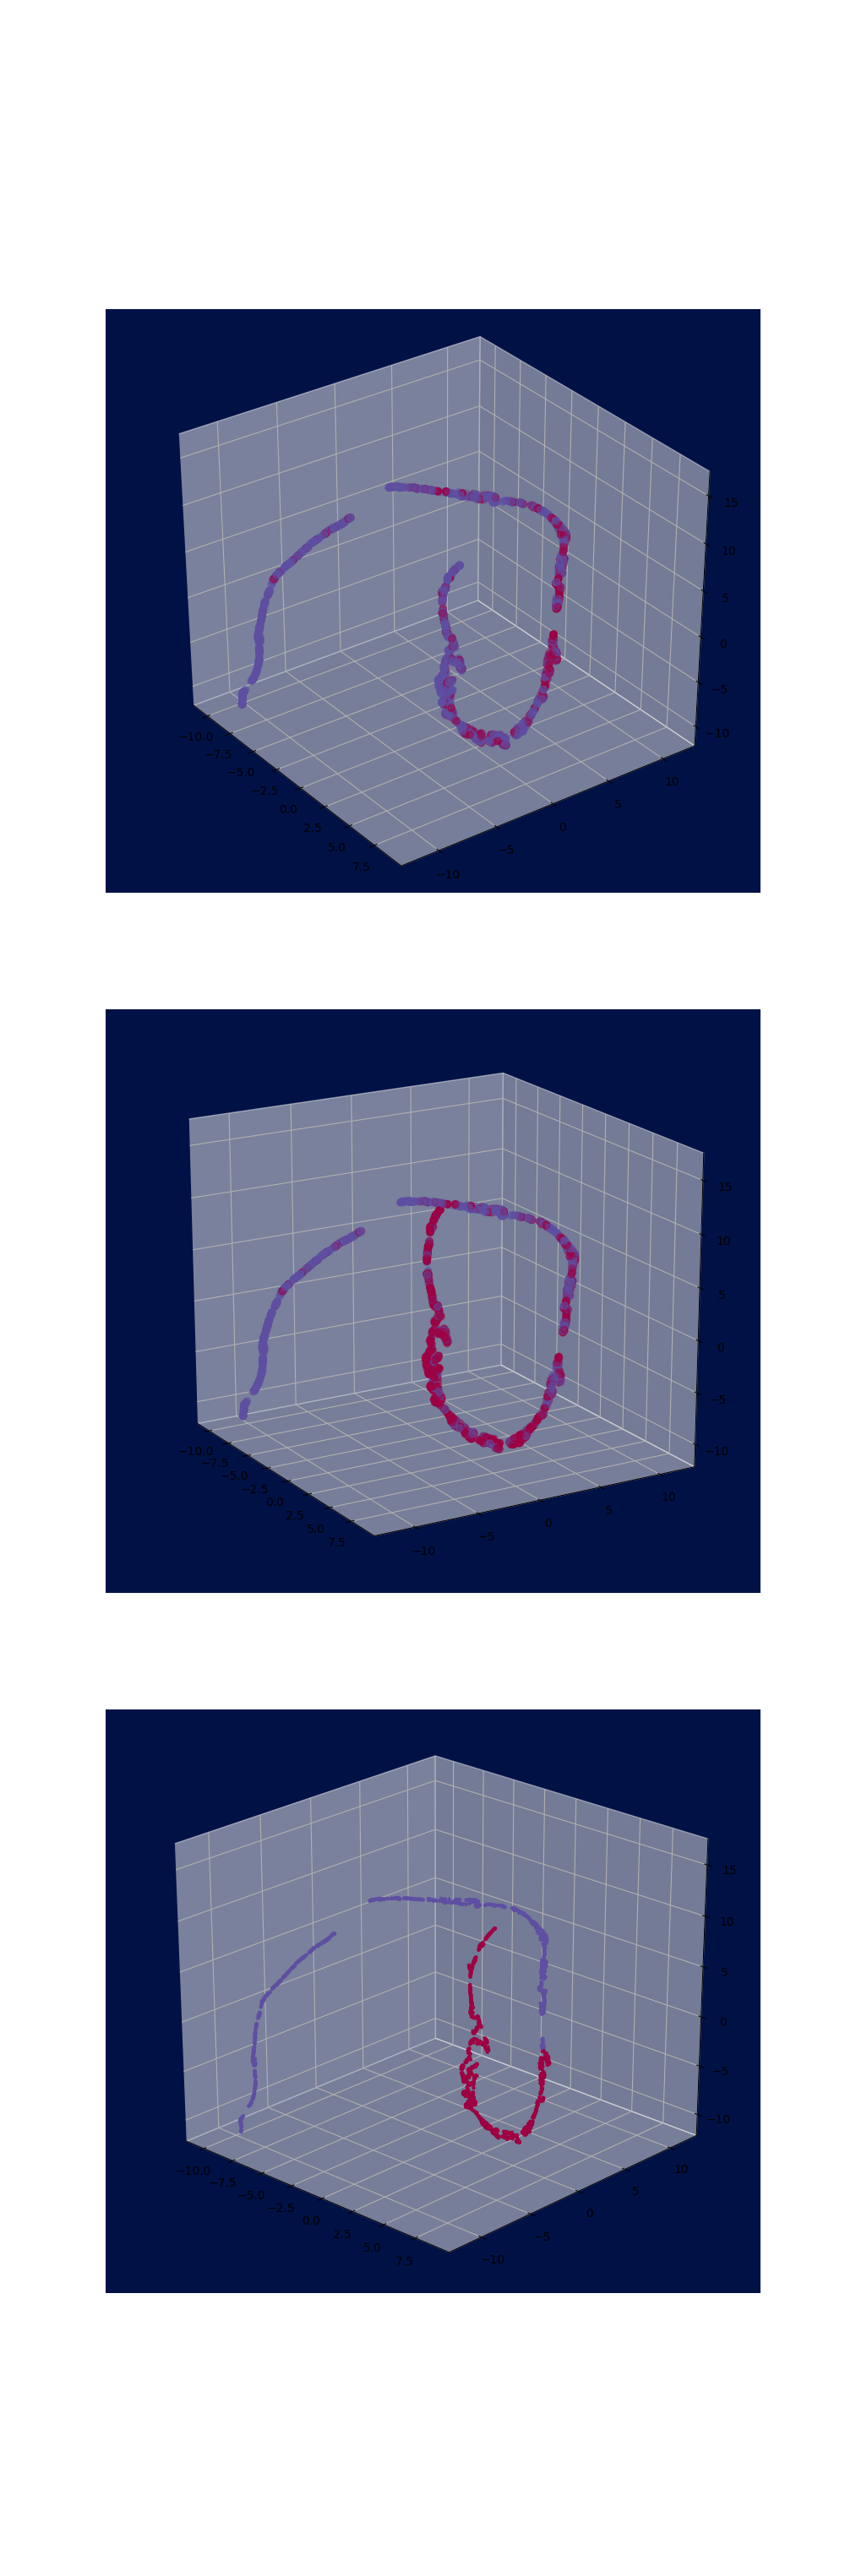

In [49]:
embedding = val_emb
targets = validation_targets
predictions = validation_predictions
correctness = np.argmax(validation_predictions, axis=1) == targets

visualize_data = embedding

visualize_target = correctness
visualize_target_2 = targets
visualize_target_3 = np.argmax(validation_predictions, axis=1)

# visualize_target = storage_dict[for_loader][4][:]
# visualize_target_2 = res
# # visualize_target_3 = np.argmax(storage_dict[for_loader][0][:], axis=1)
# visualize_target_3 = ress.mean(axis=0) <= 3/8


fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(10, 30.5, forward=True)   

ax = fig.add_subplot(3,1,1, projection = '3d')

c = visualize_target
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=35, alpha=0.5, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')




ax = fig.add_subplot(3,1,2, projection = '3d')

c = visualize_target_2
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=35, alpha=0.5, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')




ax = fig.add_subplot(3,1,3, projection = '3d')

c = visualize_target_3
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=5, alpha=1, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')



# #Setting the picker function:
# def onpick(event):
#    ind = event.ind
#    print ('index: %d\nobjective 1: %0.2f\nobjective 2: %0.2f\nobjective 3: %0.2f\nobjective 4: %0.2f\nobjective 5: %0.2f\nobjective 6: %0.2f' % (event.ind[0],data[ind,0],data[ind,1],data[ind,2],data[ind,3],data[ind,4],data[ind,5]))
#fig.canvas.mpl_connect('pick_event', onpick)


plt.show()



<IPython.core.display.Javascript object>


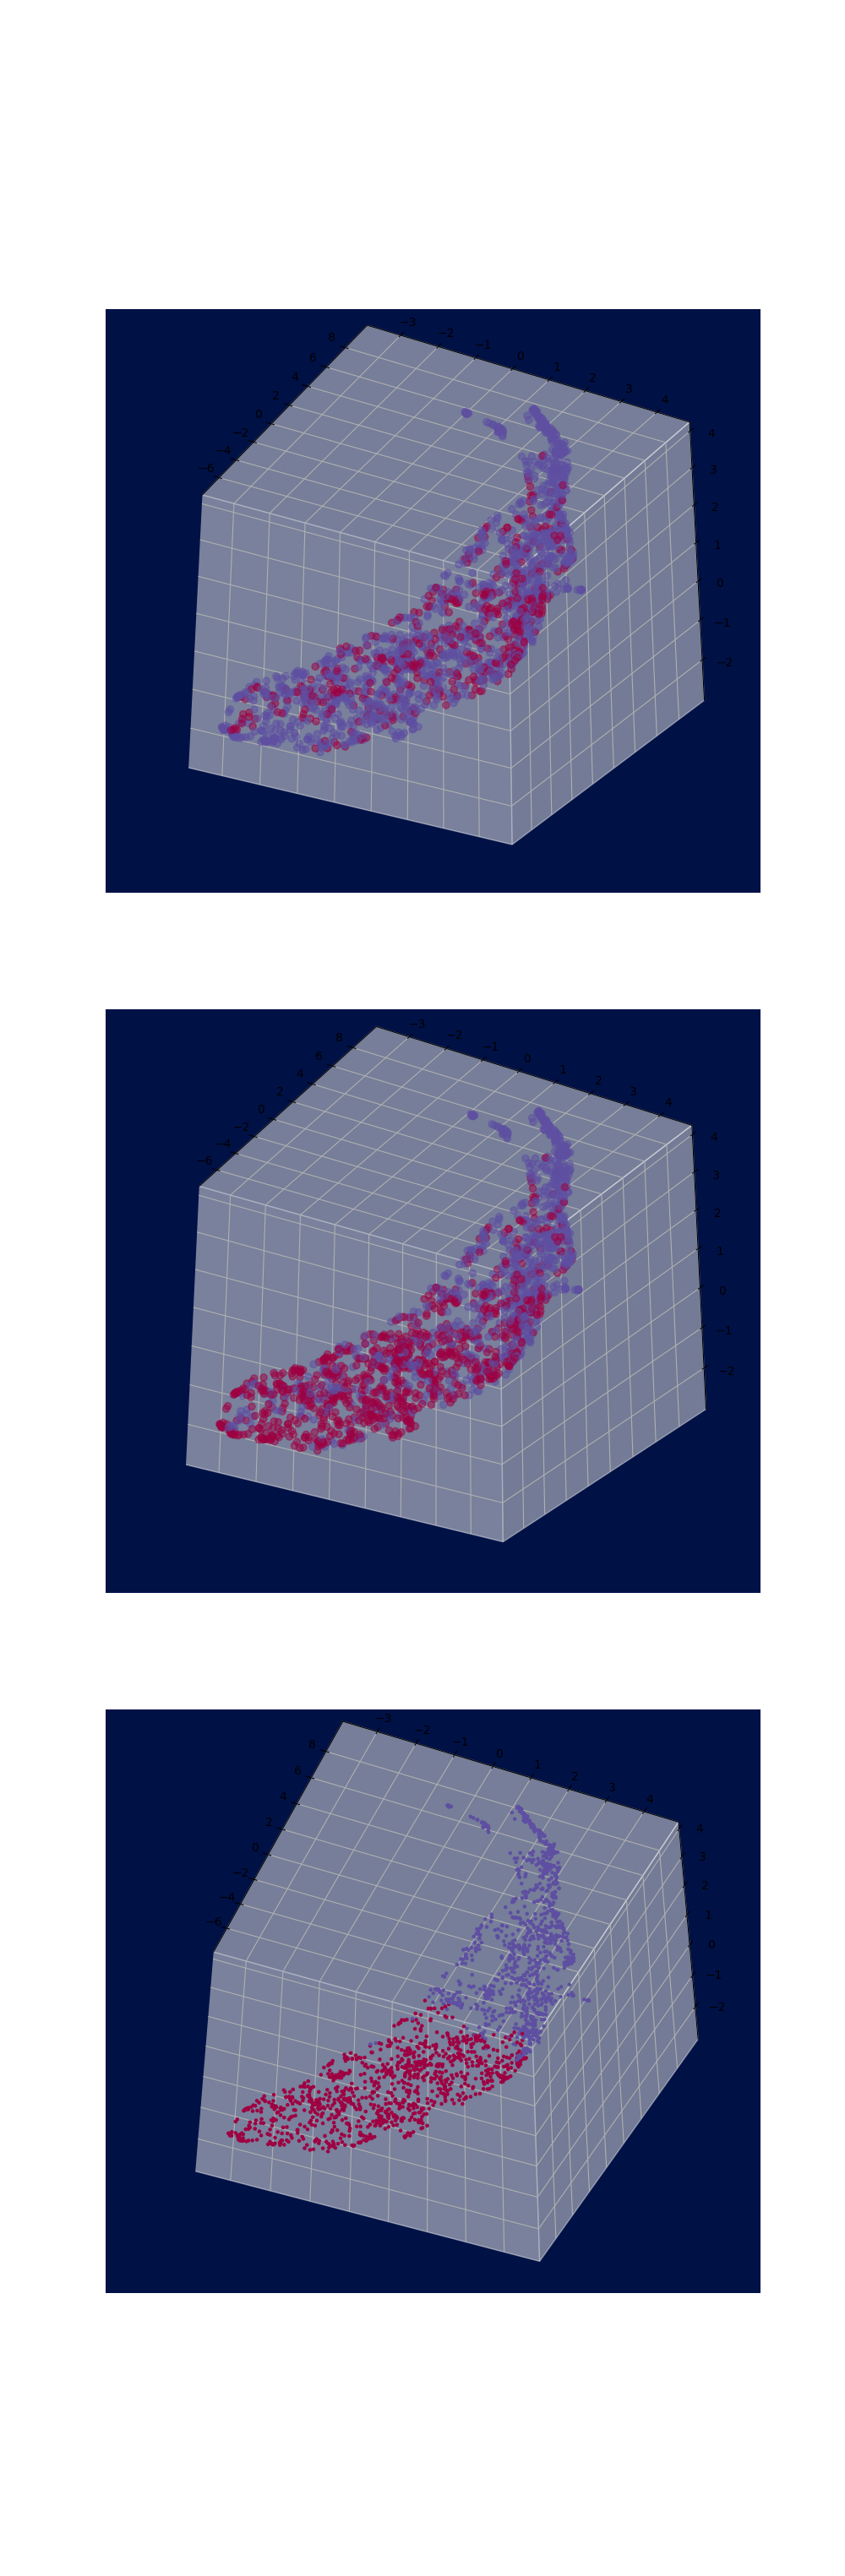

In [45]:
embedding = val_emb
targets = validation_targets
predictions = validation_predictions
correctness = np.argmax(validation_predictions, axis=1) == targets

visualize_data = embedding

visualize_target = correctness
visualize_target_2 = targets
visualize_target_3 = np.argmax(validation_predictions, axis=1)

# visualize_target = storage_dict[for_loader][4][:]
# visualize_target_2 = res
# # visualize_target_3 = np.argmax(storage_dict[for_loader][0][:], axis=1)
# visualize_target_3 = ress.mean(axis=0) <= 3/8


fig = plt.figure(figsize=plt.figaspect(0.5))
fig.set_size_inches(10, 30.5, forward=True)   

ax = fig.add_subplot(3,1,1, projection = '3d')

c = visualize_target
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=35, alpha=0.5, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')




ax = fig.add_subplot(3,1,2, projection = '3d')

c = visualize_target_2
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=35, alpha=0.5, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')




ax = fig.add_subplot(3,1,3, projection = '3d')

c = visualize_target_3
im = ax.scatter(visualize_data[:,0], visualize_data[:,1], visualize_data[:,2], c=c, s=5, alpha=1, cmap='Spectral', picker=True)
ax.set_facecolor('xkcd:navy blue')



# #Setting the picker function:
# def onpick(event):
#    ind = event.ind
#    print ('index: %d\nobjective 1: %0.2f\nobjective 2: %0.2f\nobjective 3: %0.2f\nobjective 4: %0.2f\nobjective 5: %0.2f\nobjective 6: %0.2f' % (event.ind[0],data[ind,0],data[ind,1],data[ind,2],data[ind,3],data[ind,4],data[ind,5]))
#fig.canvas.mpl_connect('pick_event', onpick)


plt.show()

